<a href="https://colab.research.google.com/github/alchemistklk/pytorch_tutorial/blob/master/02_pytorch_classification_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02.PyTorch Classification Exercise

In [ ]:
import torch

RANDOM_SEED = 42

## 1. Make a binary classification dataset with Scikit-Learn's `make_moons()` functions

- For consistency, the dataset should have 1000 samples and a `random_state=42`
- Turn the data into PyTorch Tensor
- Split the data into training data and test sets using `train_test_split` with 80% training and 20% testing

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

In [ ]:
import pandas as pd
mk_moons = pd.DataFrame({"X1": X[:, 0], "X2":X[:, 1], "y": y})

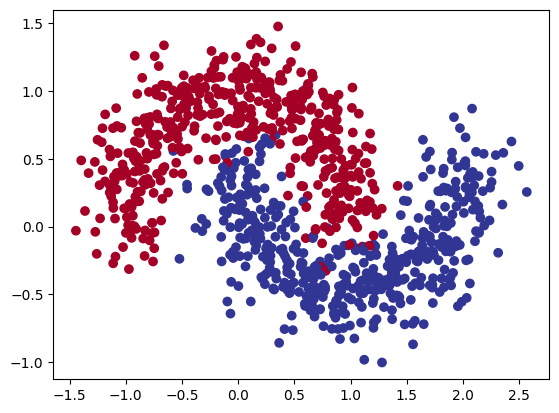

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
from sklearn.model_selection import train_test_split
# Turn data into tensor
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Building a model by subclassing `nn.Module` that incorporates non-activation functions and is capable of fitting the data you created in 1

In [ ]:
from torch import nn
class MoonModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_stack_layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=30),
        nn.ReLU(),
        nn.Linear(in_features=30, out_features=30),
        nn.ReLU(),
        nn.Linear(in_features=30, out_features=1)
    )
  def forward(self, x):
    return self.linear_stack_layers(x)

device = "cuda" if torch.cuda.is_available() else "cpu"
moonModel_0 = MoonModelV0().to(device)
moonModel_0.state_dict()


OrderedDict([('linear_stack_layers.0.weight',
              tensor([[-0.6763, -0.2037],
                      [ 0.2946, -0.3026],
                      [-0.6842,  0.3884],
                      [-0.3350,  0.0839],
                      [-0.1056,  0.3677],
                      [-0.6285,  0.2014],
                      [ 0.0025, -0.5949],
                      [ 0.5072, -0.6476],
                      [-0.0476, -0.2255],
                      [ 0.1069, -0.6231],
                      [ 0.4857,  0.1614],
                      [-0.3495, -0.6923],
                      [ 0.5075,  0.5091],
                      [ 0.1858,  0.6501],
                      [ 0.1407, -0.2240],
                      [ 0.6973, -0.6827],
                      [ 0.4494,  0.6272],
                      [-0.6654, -0.0271],
                      [ 0.0923, -0.1645],
                      [ 0.6552,  0.2839],
                      [ 0.6207,  0.5611],
                      [-0.0916,  0.4731],
                      [ 0.4627

## 3. Setup a binary classification compatible loss function and optimizer to use when training model build in 2

In [ ]:
# loss function
loss_fn = nn.BCEWithLogitsLoss()
# optimizer
optimizer = torch.optim.SGD(moonModel_0.parameters(), lr=0.1)

## 4. Creating a training and testing loop to fit the model you created in 2 to the data you created in 1

In [ ]:
!pip -q install torchmetrics

In [ ]:
import torchmetrics
# Put the data to target device
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

# Train and test model
epochs = 1000
for epoch in range(epochs):
  ### Training
  moonModel_0.train()
  # 1. Forward pass
  y_pred_logits = moonModel_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_pred_logits))
  # 2. Calculate loss
  loss = loss_fn(y_pred_logits, y_train)
  acc = torchmetrics.functional.accuracy(preds=y_pred, target=y_train, task="multiclass", num_classes=2)
  # 3. zero grad
  optimizer.zero_grad()
  # 4. backpropagation
  loss.backward()
  # 5. step
  optimizer.step()

  ### Testing
  moonModel_0.eval()
  with torch.inference_mode():
    # 1. Forward Pass
    y_test_logits = moonModel_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(y_test_logits))
    # 2. Calculate the loss
    test_loss = loss_fn(y_test_logits, y_test)
    test_acc = torchmetrics.functional.accuracy(preds=test_pred, target=y_test, task="multiclass", num_classes=2)

  if epoch % 100 == 0:
    print(f"epoch: {epoch} | loss:{loss}, acc: {acc} | test_loss:{test_loss}, test_acc:{test_acc}")


epoch: 0 | loss:0.7016780972480774, acc: 0.3737500011920929 | test_loss:0.6965022087097168, test_acc:0.4350000023841858
epoch: 100 | loss:0.2949330508708954, acc: 0.875 | test_loss:0.2979469299316406, test_acc:0.8650000095367432
epoch: 200 | loss:0.2481350302696228, acc: 0.8899999856948853 | test_loss:0.2411322146654129, test_acc:0.8899999856948853
epoch: 300 | loss:0.21001239120960236, acc: 0.9087499976158142 | test_loss:0.1992872655391693, test_acc:0.9150000214576721
epoch: 400 | loss:0.16999028623104095, acc: 0.9325000047683716 | test_loss:0.15627478063106537, test_acc:0.9399999976158142
epoch: 500 | loss:0.13647547364234924, acc: 0.9549999833106995 | test_loss:0.12076085060834885, test_acc:0.9700000286102295
epoch: 600 | loss:0.11404597014188766, acc: 0.9612500071525574 | test_loss:0.09645702689886093, test_acc:0.9750000238418579
epoch: 700 | loss:0.1002209261059761, acc: 0.9662500023841858 | test_loss:0.08121619373559952, test_acc:0.9750000238418579
epoch: 800 | loss:0.09141615778

## 5.Make predictions with your trained model and plot them using `plot_decision_boundary()` function created in this notebook

In [ ]:
# Plot the model predictions
import numpy as np

def plot_decision_boundary(model, X, y):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

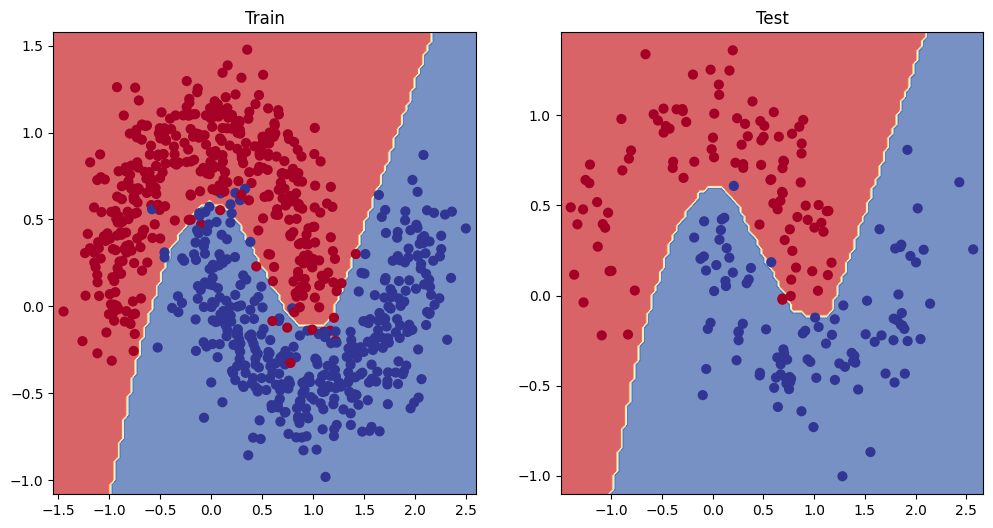

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(moonModel_0, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(moonModel_0, X_test, y_test) # model_3 = has non-linearity

## 6. Replicate the Tanh(hyperbolic tangent) activation function in pure PyTorch

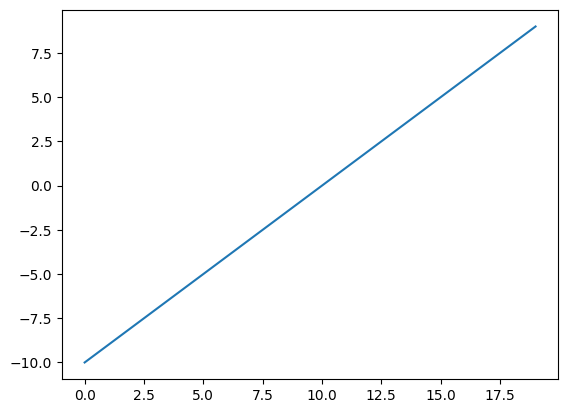

In [ ]:
# Create a straight line tensor
A = torch.arange(-10, 10, 1, dtype=torch.float)
plt.plot(A)

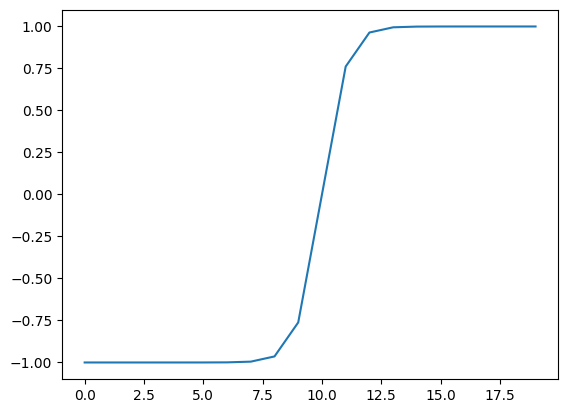

In [ ]:
# Test torch.tanh() on the tensor and plot it
def tanh(x):
  return torch.tanh(x)
plt.plot(tanh(A))

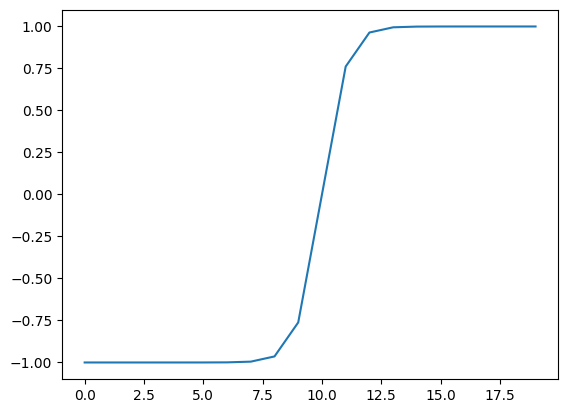

In [ ]:
# Replicate torch.tanh() and plot it
def diy_tanh(x):
  return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))
plt.plot(diy_tanh(A))

## 7. Create a multi-class dataset using the spirals data creation function from CS231n

- Split the data into traning and testing sets(80% train, 20% test) as well turn it into PyTorch tensor
- Construct a model capable of fitting the data(you may need a combination of linear and non-linear layers)
- Build a loss function and optimizer capable of handling multi-class data(use Adam instead of SGD, you may have to experiment different values of learning rate to get it working)
- Make a traning and testing loop for multi-class data and train a model on it to reach over 95% testing accuracy
- Plot the decision boundaries on spirals dataset from your model predictions

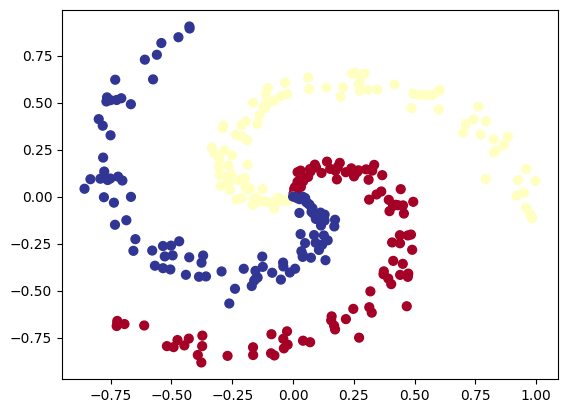

In [ ]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()


In [ ]:
# Turn data into numpy
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

TypeError: expected np.ndarray (got Tensor)

In [ ]:
!pip -q install torchmetrics

In [ ]:
from torchmetrics import Accuracy
accuracy_fn = Accuracy(task="multiclass", num_classes=3).to(device)

In [ ]:
class SpiralModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(in_features=2, out_features=10)
    self.linear2 = nn.Linear(in_features=10, out_features=10)
    self.linear3 = nn.Linear(in_features=10, out_features=4)
    self.relu = nn.ReLU()
  def forward(self, x):
    return self.linear3(self.relu(self.linear2(self.relu(self.linear1(x)))))

# 运行到GPU上面
spiralModel = SpiralModel().to(device)

In [ ]:
# Setup data to device agnostic
X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)
x_ori_logits = spiralModel(X_train[:10])
x_ori_pred = torch.softmax(x_ori_logits, dim=1).argmax(dim=1)

In [ ]:
print("Logits:")
print(x_ori_logits[:10])
print("Pred probs")
print(x_ori_pred[:10])

Logits:
tensor([[-0.1373, -0.2802, -0.2005,  0.0586],
        [-0.1390, -0.2827, -0.2006,  0.0552],
        [-0.1245, -0.2694, -0.2211,  0.0629],
        [-0.1105, -0.2534, -0.2459,  0.0648],
        [-0.1165, -0.2554, -0.2429,  0.0627],
        [-0.1203, -0.2644, -0.2295,  0.0637],
        [-0.1208, -0.2654, -0.2280,  0.0638],
        [-0.1415, -0.3153, -0.1898,  0.0487],
        [-0.1285, -0.2713, -0.2136,  0.0598],
        [-0.1105, -0.2533, -0.2461,  0.0647]], grad_fn=<SliceBackward0>)
Pred probs
tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])


In [ ]:
# setup loss function and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(spiralModel.parameters(), lr=0.01)


In [ ]:
epochs = 1000
for epoch in range(epochs):
  ### Training
  spiralModel.train()
  # 1.Forward pass
  x_pred_logits = spiralModel(X_train)
  y_pred = torch.softmax(x_pred_logits, dim=1).argmax(dim=1)
  # 2.Calculate the loss
  loss = loss_fn(x_pred_logits, y_train)
  acc = accuracy_fn(y_pred, y_train)
  # 3. zero grad
  optimizer.zero_grad()
  # 4. backward
  loss.backward()
  # 5. step
  optimizer.step()

  ### Trainign
  spiralModel.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = spiralModel(X_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    # calculate the loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(test_pred, y_test)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss}, Acc:{acc} | Test Loss:{test_loss}, Test Acc:{test_acc}")

Epoch: 0 | Loss: 1.4516984224319458, Acc:0.0 | Test Loss:1.4256714582443237, Test Acc:0.0
Epoch: 100 | Loss: 0.4046786427497864, Acc:0.8083333373069763 | Test Loss:0.3874358832836151, Test Acc:0.8500000238418579
Epoch: 200 | Loss: 0.09102782607078552, Acc:0.9750000238418579 | Test Loss:0.057366080582141876, Test Acc:1.0
Epoch: 300 | Loss: 0.054046232253313065, Acc:0.9916666746139526 | Test Loss:0.02026923932135105, Test Acc:1.0
Epoch: 400 | Loss: 0.040612220764160156, Acc:0.9916666746139526 | Test Loss:0.011425652541220188, Test Acc:1.0
Epoch: 500 | Loss: 0.029348956421017647, Acc:0.9916666746139526 | Test Loss:0.004619544371962547, Test Acc:1.0
Epoch: 600 | Loss: 0.02511759288609028, Acc:0.9916666746139526 | Test Loss:0.002499561058357358, Test Acc:1.0
Epoch: 700 | Loss: 0.022532017901539803, Acc:0.9916666746139526 | Test Loss:0.001360766589641571, Test Acc:1.0
Epoch: 800 | Loss: 0.020725106820464134, Acc:0.9916666746139526 | Test Loss:0.0007696427637711167, Test Acc:1.0
Epoch: 900 | 

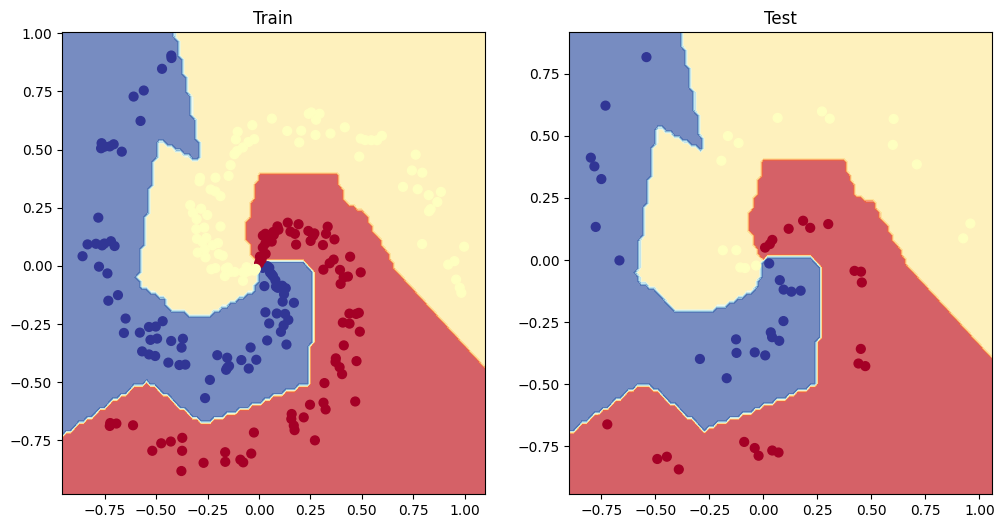

In [ ]:
# Plot decision boundaries for training and testing
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(spiralModel, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(spiralModel, X_test, y_test)

## 8. ExtraCurriculum
https://medium.com/towards-data-science/stochastic-gradient-descent-with-momentum-a84097641a5d

### Gradient Descent with Momentum
When you plotted consine function and added some Gaussian noise. What we want to do with this data is, instead of using it. we want some kind of 'moving' average which would 'denoise' the data and bring it closer to the original function.

```python
torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
```

### Activation Function


